In [15]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os 
import statistics

#files to load
city_data_toload = "data/city_data.csv"
ride_data_toload = "data/ride_data.csv"

#read csv files
city_path = os.path.join("city_data.csv")
ride_path = os.path.join("ride_data.csv")
city_data = pd.read_csv(city_path)
ride_data = pd.read_csv(ride_path)

#combine the data
pyber_data_combined = pd.merge(city_data, ride_data,how='outer', on="city")
pyber_data_combined.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [30]:
#separate city types into different data frames
urban_city = pyber_data_combined.loc[(pyber_data_combined["type"] == "Urban")]
suburban_city = pyber_data_combined.loc[(pyber_data_combined["type"] == "Suburban")]
rural_city = pyber_data_combined.loc[(pyber_data_combined["type"] == "Rural")]

In [34]:
#Y AXIS: Average Fare/X AXIS: Total Number of Rides/SIZE:Total Drivers Per City - Urban
avg_fare_urban = urban_city.groupby("city")['fare'].mean()
total_rides_urban = urban_city.groupby("city")["ride_id"].count()
total_drivers_urban = urban_city.groupby("city")['driver_count'].value_counts()

#Y AXIS: Average Fare/X AXIS: Total Number of Rides/SIZE:Total Drivers Per City - Suburban
avg_fare_suburban = suburban_city.groupby("city")['fare'].mean()
total_rides_suburban = suburban_city.groupby("city")["ride_id"].count()
total_drivers_suburban = suburban_city.groupby("city")['driver_count'].value_counts()

#Y AXIS: Average Fare/X AXIS: Total Number of Rides/SIZE:Total Drivers Per City - Rural
avg_fare_rural = rural_city.groupby("city")['fare'].mean()
total_rides_rural = rural_city.groupby("city")["ride_id"].count()
total_drivers_rural = rural_city.groupby("city")['driver_count'].value_counts()


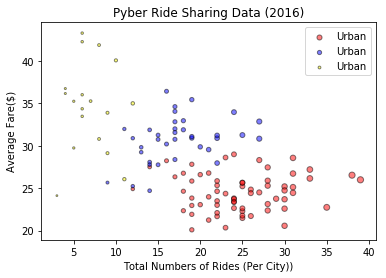

In [40]:
#Bubble Plot/plot in a scatter plot
#URBAN - RED
plt.scatter(total_rides_urban, avg_fare_urban,s=total_drivers_urban, alpha = 0.5,
            marker ='o', facecolors ="red", edgecolors='black', label="Urban")
#SUBURBAN - BLUE
plt.scatter(total_rides_suburban, avg_fare_suburban,s=total_drivers_suburban, alpha = 0.5,
            marker ='o', facecolors ="blue", edgecolors='black', label="Urban")

#RURAL - YELLOW
plt.scatter(total_rides_rural, avg_fare_rural,s=total_drivers_rural, alpha = 0.5,
            marker ='o', facecolors ="yellow", edgecolors='black', label="Urban")

# TITLE
plt.title("Pyber Ride Sharing Data (2016)")
# LABELS
plt.xlabel("Total Numbers of Rides (Per City))")
plt.ylabel("Average Fare($)")

# lEGEND
plt.legend(loc='upper right')

#RESIZING
#SAVE AS PNG